In [1]:
import numpy as np
import matplotlib.pyplot as plt

import imageio, io
from PIL import Image


In [8]:
im = imageio.imread("./teapot.jpg")

In [4]:
im.shape

(1096, 1130, 3)

In [9]:
pp = im[:,:,0]

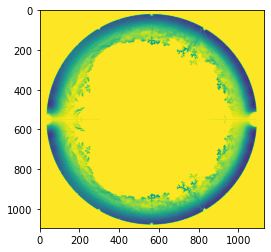

In [10]:
plt.imshow(pp);

In [14]:
pp.shape

(1096, 1130)

In [20]:
X, Y = np.where(pp == 0)

In [23]:
min(X), max(X)

(16, 1079)

In [24]:
min(Y),max(Y)

(32, 1095)

In [12]:
source = pp[16:1079, 32:1095]

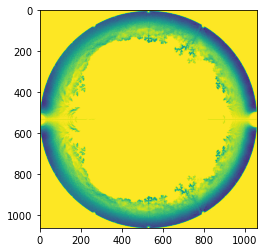

In [13]:
source = source[:1062,:1062]
plt.imshow(source);

In [14]:
npts = 1062
ww = 1.5
X = np.linspace(-ww, ww, npts)
Y = np.linspace(-ww, ww, npts)

#broadcast X to a square array of cplx
C = X[:, None] + 1J*Y
f_C = 531 / C + 531*(1+1J)


In [15]:
sample = np.where(np.abs(C) > 1)
X, Y = sample
indices_src = 1062*X + Y

In [16]:
A = f_C[sample].real.astype(int)
B = f_C[sample].imag.astype(int)
indices_target = 1062*A + B
#have to clip
indices_target = indices_target[indices_target < 1062**2]

In [17]:
src_flat = source.ravel()
target_flat = np.zeros_like(src_flat)
# this is what works -  it's a pullback 
target_flat[indices_src] = np.take( src_flat, indices_target)
yy = 255 - target_flat
im = np.array((yy.reshape(1062,1062),)*3).T
plt.imsave("gaga.png", im);

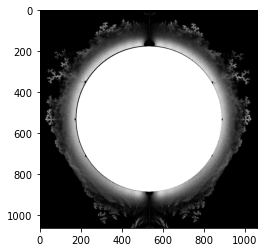

In [18]:
plt.imshow(im);

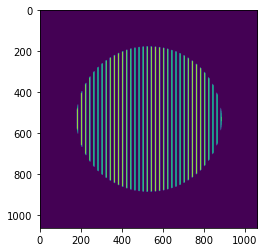

In [19]:
vv  = np.zeros((1062,1062))
for k in range(0,vv.shape[1],20):
    vv[:,k:k+5] = 255

vvv = vv.ravel()

A, B  = np.where(np.abs(C) > 1)
ii = 1062*A + B
vvv[ii] = 0

plt.imshow( vv.reshape((npts,npts)))

In [292]:
ff.shape

(1063, 1063)

0.0018660687910670905

array([-0.41666667+0.41666667j, -0.41745283+0.41666593j,
       -0.41824047+0.41666369j, ...,  0.41824047-0.41666369j,
        0.41745283-0.41666593j,  0.41666667-0.41666667j])

In [284]:
ff = np.zeros_like(ss)
for k in range(0,ff.shape[1],20):
    ff[:,k:k+5] = 255
ff.shape

(1063, 1063)

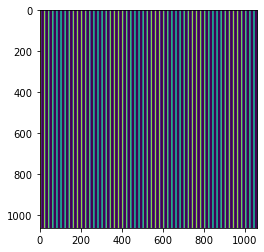

In [252]:
plt.imshow(ff)